## Metody se zvýšenou účinností

a. Nalezením hlavní části integrované funkce

b. Symetrizací

c. Váženým výběrem


#### 1. Nalezení hlavní části:

Integrál rozdělit na dvě části – jednu dávající hlavní vklad do výsledku a druhou jako upřesňující korekci 

I = ∫(a,b) f(x) =∫(a,b) g(x)+ ∫(a,b) h(x)

I = ((b-a)/n) * Σ [f(ξi) − g(ξi)] + ∫ g(x) dx .
prvni stredni hodnota + analyticky(posledni hodnotu spocitat rucne)

g(x) = x * e^x
h(x) = (1-x)

???? Jestli tajleruv rozvoj to 1 clen sam o sobe e^x

In [1]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import time

In [2]:
def f_ce(x):
    return np.exp(x)

def gx(x):
    return x * np.exp(x)

def nahodny_x(a, b):
    return random.uniform(a, b)

In [3]:
def hlavni_cast(pocet_rozlozeni, a, b):
    start = time.time()

    hodnota_fce = 0

    for i in range(pocet_rozlozeni):
        x = nahodny_x(a,b) 
        hodnota_fce += f_ce(x) - gx(x)

    integral = ((b-a)/ pocet_rozlozeni) * (hodnota_fce)  + ( 4*(np.exp(b)) + 1) 
    
    return integral, time.time()-start

#### 2. Metoda váženého výběru:

nebudeme volit náhodná čísla ξ v intervalu <a,b>

rozdělíme integrační interval <a,b> na několik dílčích intervalů, *<a,c1>, <c1, c2>,..., <ck, b>. V každém budeme generovat jiný počet náhodných čísel ξi: n1, n2,. . . ,nk+1.  

n1 + n2 + ... + nk+1 = n 

I = ∫(a,c1) f(x) + ... + ∫(ck,b) f(x)

In [4]:
import time
def generovani(pocet_iteraci, a, b):
    start = time.time()
    hodnota = 0
    for i in range(pocet_iteraci):
        x = nahodny_x(a, b)
        hodnota += f_ce(x)
    
    return hodnota/pocet_iteraci
        
        
a, b = 0, 5
pocet_iteraci = [ int(13e4), int(17e4), int(80e4) ]
interval_1 = [0, 2.5]
interval_2 = [2.5, 4]
interval_3 = [4, 5]
vysledek = 0
start = time.time()
vysledek= generovani(pocet_iteraci[0], interval_1[0], interval_1[1]) + generovani(pocet_iteraci[1], interval_2[0], interval_2[1]) + generovani(pocet_iteraci[2], interval_3[0], interval_3[1])
vysledny_cas = time.time() - start
print(vysledny_cas)

2.0760421752929688


#### 3. Metoda symetrizace integrované funkce:

Budeme se proto snažit integrovanou funkci upravit tak, aby rozptyl výpočtu poklesl, tj. aby se funkce na integračním intervalu měnila co nejméně

Je-li funkce f(x) např. monotónně rostoucí nebo klesající, je ji vhodné symetrizovat podle vztahu

I = (b-a)/2n * Σ [ f(ξi) + f(a+b-ξi)]

In [5]:
def symetrizace(pocet_iteraci, a, b): 
    
    start = time.time()
    hodnota = 0

    for i in range(pocet_iteraci):
        x = nahodny_x(a, b)
        hodnota += f_ce(x) + f_ce(a+b-x)
    hodnota /= pocet_iteraci

    integral = (b-a)/2 * hodnota * 5 # (* b-a)
    
    return integral, time.time() - start    

### Porovnani metod

In [6]:
pocet_iteraci = [10000, 100000, 1000000]
a,b = 0, 5
intervaly = [[0, 2.5], [2.5, 4], [4, 5]]

presnost_a = [] 
presnost_b = []
presnost_c = []
casova_narocnost_a = []
casova_narocnost_b = []
casova_narocnost_c = []

for iterace in pocet_iteraci:
    presnost, casova_narocnost = hlavni_cast(iterace, a,b)
    presnost_a.append(presnost)
    casova_narocnost_a.append(casova_narocnost)
    
    presnost, casova_narocnost = symetrizace(iterace, a,b)
    presnost_c.append(presnost)
    casova_narocnost_c.append(casova_narocnost)
    
    iterace_b = iterace/ 10
    sada_iteraci = [ int(iterace_b), int(iterace_b*1.5), int(iterace_b*7.5) ]
    start = time.time()
    vysledek = generovani(sada_iteraci[0], intervaly[0][0], intervaly[0][1]) + generovani(sada_iteraci[1], intervaly[1][0], intervaly[1][1]) + generovani(sada_iteraci[2], intervaly[2][0], intervaly[2][1])
    vysledny_cas = time.time() - start
    presnost_b.append(vysledek)
    casova_narocnost_b.append(vysledny_cas)

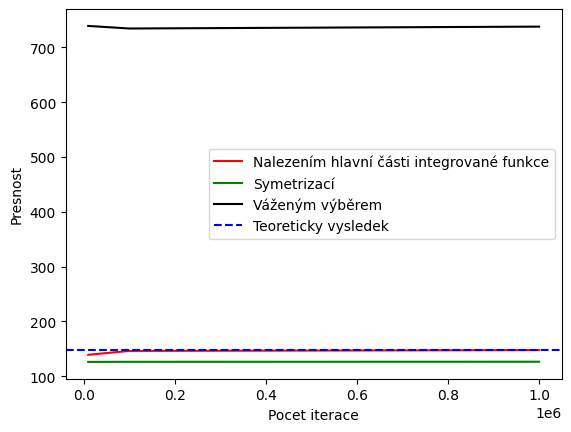

In [7]:
plt.xlabel("Pocet iterace")
plt.ylabel("Presnost")
plt.plot(pocet_iteraci, presnost_a, color = "red", label = "Nalezením hlavní části integrované funkce")
plt.plot(pocet_iteraci, presnost_b, color = "green", label = "Symetrizací")
plt.plot(pocet_iteraci, presnost_c, color = "black", label = "Váženým výběrem")
plt.axhline(y = 147.41316, color = 'blue', linestyle = '--', label = "Teoreticky vysledek") 
plt.legend()
plt.show()

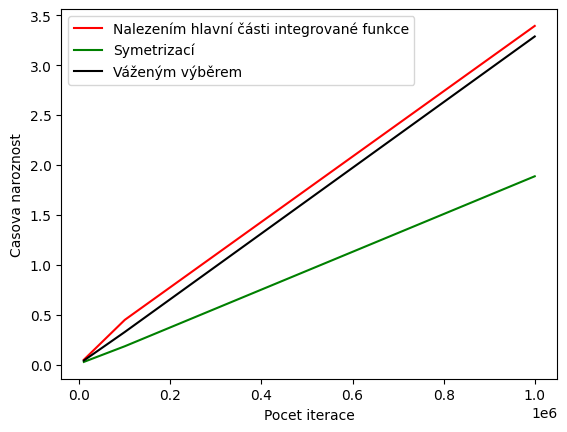

In [8]:
plt.xlabel("Pocet iterace")
plt.ylabel("Casova naroznost")
plt.plot(pocet_iteraci, casova_narocnost_a, color = "red", label = "Nalezením hlavní části integrované funkce")
plt.plot(pocet_iteraci, casova_narocnost_b, color = "green", label = "Symetrizací")
plt.plot(pocet_iteraci, casova_narocnost_c, color = "black", label = "Váženým výběrem")
plt.legend()
plt.show()